In [52]:
import pandas as pd
import numpy as np
from astropy.io import ascii as ap_ascii
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [31]:
!ls -l

total 42216
-rw-rw-r-- 1 ubuntu ubuntu   112849 Oct 13 23:56 eda.ipynb
-rw-rw-r-- 1 ubuntu ubuntu 31546781 Oct  8 23:30 full_tce_list.csv
-rw-rw-r-- 1 ubuntu ubuntu  3248616 Oct 13 23:36 kplr_dr25_obs_robovetter_output.txt
-rw-rw-r-- 1 ubuntu ubuntu    11626 Oct  8 21:13 main.py
-rw-rw-r-- 1 ubuntu ubuntu  2744865 Oct 13 23:12 q1_q17_dr25_koi.csv
-rw-rw-r-- 1 ubuntu ubuntu  5546910 Oct 13 23:11 q1_q17_dr25_tce.csv
drwxrwxr-x 2 ubuntu ubuntu     4096 Oct 13 22:58 test.fits


In [32]:
tce=pd.read_csv('kplr_dr25_obs_robovetter_output.txt',delim_whitespace=True)

In [33]:
tce

,#1:TCE,2:Robovetter_Score,3:Disposition,4:Not_Transit-Like_Flag,5:Stellar_Eclipse_Flag,6:Centroid,Offset_Flag,7:Ephemeris_Match_Flag,8:Minor_Descriptive_Flags
0,000757099-01,0.000,FP,1,0,0,0,LPP_DV---LPP_ALT---MOD_NONUNIQ_DV,NaN
1,000757450-01,0.999,PC,0,0,0,0,NaN,NaN
2,000892376-01,0.000,FP,1,0,0,0,INDIV_TRANS_CHASES_MARSHALL---LPP_DV---ALL_TRA...,NaN
3,000892376-02,0.000,FP,1,0,0,0,LPP_DV---MOD_NONUNIQ_DV---CENT_KIC_POS,NaN
4,000892376-03,0.000,FP,1,0,0,0,INDIV_TRANS_RUBBLE---TRANS_GAPPED---LPP_DV---L...,NaN
...,...,...,...,...,...,...,...,...,...
32529,012885212-01,0.001,FP,0,0,1,0,CENT_RESOLVED_OFFSET,NaN
32530,012885212-02,0.638,PC,0,0,0,0,NaN,NaN
32531,012885505-01,0.000,FP,1,0,0,0,INDIV_TRANS_MARSHALL---LPP_DV---INCONSISTENT_T...,NaN
32532,012935144-01,0.000,FP,0,0,1,0,CENT_RESOLVED_OFFSET---HALO_GHOST,NaN


In [34]:
tce.columns=['TCE_ID','rv_score','disposition','not_transit','stellar_eclipse','centroid_offset','ephemeris','other','delete']
tce.drop('delete',axis=1,inplace=True)
tce

,TCE_ID,rv_score,disposition,not_transit,stellar_eclipse,centroid_offset,ephemeris,other
0,000757099-01,0.000,FP,1,0,0,0,LPP_DV---LPP_ALT---MOD_NONUNIQ_DV
1,000757450-01,0.999,PC,0,0,0,0,NaN
2,000892376-01,0.000,FP,1,0,0,0,INDIV_TRANS_CHASES_MARSHALL---LPP_DV---ALL_TRA...
3,000892376-02,0.000,FP,1,0,0,0,LPP_DV---MOD_NONUNIQ_DV---CENT_KIC_POS
4,000892376-03,0.000,FP,1,0,0,0,INDIV_TRANS_RUBBLE---TRANS_GAPPED---LPP_DV---L...
...,...,...,...,...,...,...,...,...
32529,012885212-01,0.001,FP,0,0,1,0,CENT_RESOLVED_OFFSET
32530,012885212-02,0.638,PC,0,0,0,0,NaN
32531,012885505-01,0.000,FP,1,0,0,0,INDIV_TRANS_MARSHALL---LPP_DV---INCONSISTENT_T...
32532,012935144-01,0.000,FP,0,0,1,0,CENT_RESOLVED_OFFSET---HALO_GHOST


In [35]:
tce.disposition.value_counts()

FP    28497
PC     4037
Name: disposition, dtype: int64

In [37]:
tce_features=ap_ascii.read('kplr_dr25_obs_robovetter_input.txt')

In [38]:
tce_features.meta

OrderedDict([('comments',
              ['Description of IPAC file format: http://exoplanetarchive.ipac.caltech.edu/docs/ddgen/ipac_tbl.html',
               'Astropy Python tool to read IPAC format: http://docs.astropy.org/en/stable/api/astropy.io.ascii.Ipac.html',
               'IDL tool to read IPAC format: https://irsa.ipac.caltech.edu/tools/pro/read_ipac_table.pro',
               'Column Definitions',
               'Data_Set',
               'An identifier for what set of data the TCE belongs to --- either Observed (OBS), Inverted (INV), Scrambled Set 1 (SCR1), Scrambled Set 2 (SCR2), Scrambled Set 3 (SCR3), Injected Group 1 (INJ1; the on-target planets), Injected Group 2 (INJ2; the off-target planets), or Injected Group 3 (INJ3; the eclipsing binaries).',
               'TCE_ID',
               'The Threshold Crossing Event (TCE) identifier, consisting of the Kepler Input Catalog (KIC) ID, followed by a dash, and then the planet number.',
               'KIC',
               '

In [39]:
tce_features=tce_features.to_pandas()

In [40]:
tce_total=tce.merge(tce_features,on='TCE_ID' )
tce_total['radius_ratio']=(tce_total.rstar)/tce_total.rp_dv

In [41]:
tce_total.shape

(32534, 109)

In [42]:
tce_total.to_csv('full_tce_list.csv',index=False)

In [43]:
tce_total=pd.read_csv('full_tce_list.csv')

In [44]:
tce_total

,TCE_ID,rv_score,disposition,not_transit,stellar_eclipse,centroid_offset,ephemeris,other,Data_Set,KIC,...,alb_alt,alb_alt_perr,alb_alt_merr,mod_depth_pri_alt,mod_depth_sec_alt,mod_ph_sec_alt,mod_ph_ter_alt,sdepthsig_dv,sdepthsig_alt,radius_ratio
0,000757099-01,0.000,FP,1,0,0,0,LPP_DV---LPP_ALT---MOD_NONUNIQ_DV,OBS,757099,...,0.795,0.941,0.384,0.001129,0.000402,0.540894,0.000000,0.000000,0.000000,1.076020
1,000757450-01,0.999,PC,0,0,0,0,NaN,OBS,757450,...,2.457,0.574,0.579,0.015339,0.000094,0.405275,0.769840,0.168748,0.113356,0.080825
2,000892376-01,0.000,FP,1,0,0,0,INDIV_TRANS_CHASES_MARSHALL---LPP_DV---ALL_TRA...,OBS,892376,...,20564.039,15540.262,6765.046,0.000820,0.000309,0.627224,0.404876,-1.000000,-1.000000,0.305556
3,000892376-02,0.000,FP,1,0,0,0,LPP_DV---MOD_NONUNIQ_DV---CENT_KIC_POS,OBS,892376,...,12.150,9.061,4.186,0.000111,0.000030,0.504963,0.000000,0.016516,0.033440,0.876812
4,000892376-03,0.000,FP,1,0,0,0,INDIV_TRANS_RUBBLE---TRANS_GAPPED---LPP_DV---L...,OBS,892376,...,2766.420,26284.655,2185.186,0.001205,0.000971,0.713854,0.856854,-1.000000,-1.000000,0.123975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32529,012885212-01,0.001,FP,0,0,1,0,CENT_RESOLVED_OFFSET,OBS,12885212,...,7.880,12.196,3.884,0.000320,0.000038,0.442287,0.713401,0.445814,0.460570,0.493960
32530,012885212-02,0.638,PC,0,0,0,0,NaN,OBS,12885212,...,1473.600,12247.123,1068.208,0.000840,0.000268,0.366811,0.534503,0.549336,0.101915,0.217109
32531,012885505-01,0.000,FP,1,0,0,0,INDIV_TRANS_MARSHALL---LPP_DV---INCONSISTENT_T...,OBS,12885505,...,13832.447,63379.154,8693.629,0.000148,0.000073,0.917918,0.804026,-1.000000,-1.000000,0.583803
32532,012935144-01,0.000,FP,0,0,1,0,CENT_RESOLVED_OFFSET---HALO_GHOST,OBS,12935144,...,1.924,9.736,1.343,0.000261,0.000024,0.836015,0.587757,0.140447,0.161009,0.543871


In [58]:
print('Count of Stars (KIC) by Number of TCE for Each Star')
print('_'*50)
tce_total.groupby('KIC').disposition.count().sort_values(ascending=False).value_counts()

Count of Stars (KIC) by Number of TCE for Each Star
__________________________________________________


1     9785
2     3503
3     1385
4      725
5      464
6      323
7      225
8      157
9       91
10      78
Name: disposition, dtype: int64

In [67]:
pc_per_planet=tce_total[
    tce_total.disposition=="PC"].groupby(['KIC','disposition']).disposition.count().sort_values(ascending=False)
print('Stars with Five or More Planet Candidates')
print('_'*42)
pc_per_planet[pc_per_planet>4]

Stars with Five or More Planet Candidates
__________________________________________


KIC       disposition
10187017  PC             6
11442793  PC             6
6541920   PC             6
10397751  PC             5
11497958  PC             5
8120608   PC             5
8150320   PC             5
6278762   PC             5
5689351   PC             5
5436502   PC             5
8280511   PC             5
4833421   PC             5
9787239   PC             5
7100673   PC             5
9458613   PC             5
10122538  PC             5
6962977   PC             5
6850504   PC             5
5301750   PC             5
4852528   PC             5
11709124  PC             5
7673192   PC             5
Name: disposition, dtype: int64

In [12]:
column_desc={'disposition':'Is TCE false positive or planet candidate?',
             'rv_score':'Robovetter disposition score (arbitrary)',
            'rstar':'Star radius in units of solar radii (radius of our sun)',
            'period':'Calculated orbital period in days',
            'rp_dv':'Calculated planet candidate radius (with earth = 1)',
            'n_plan':'Number of TCE for relevant star',
            'nrealt':'Number of transit events Kepler measured',
             'depth':'Ratio of the surface area of the star\'s disk blocked out by the planet\'s disk ',
             'radius_ratio':'Relative ratio of star to planet (vs sun/earth)'
            }

In [13]:
print('Categorization of Transit Crossing Events - False Positive or Planet Candidate?')
tce_total.disposition.value_counts()


Categorization of Transit Crossing Events - False Positive or Planet Candidate?


FP    28497
PC     4037
Name: disposition, dtype: int64

In [14]:
tce_columns=['disposition','rv_score','rstar','period','rp_dv','n_plan','nrealt','depth','radius_ratio']
tce_analyze=tce_total[tce_columns]

In [15]:
print('Mean of Key Measures by FP/PC')
print('_'*80)
tce_analyze.groupby('disposition').mean()

Mean of Key Measures by FP/PC
________________________________________________________________________________


,rv_score,rstar,period,rp_dv,n_plan,nrealt,depth,radius_ratio
disposition,,,,,,,,
FP,0.002372,3.503786,152.386036,351087.084294,3.649402,423.149419,9406.533479,inf
PC,0.943994,1.291426,33.766407,3.516582,1.858311,224.001486,1501.021654,0.51986


In [16]:
print('Median of Key Measures by FP/PC')
print('_'*65)
tce_analyze.groupby('disposition').median()

Median of Key Measures by FP/PC
_________________________________________________________________


,rv_score,rstar,period,rp_dv,n_plan,nrealt,depth,radius_ratio
disposition,,,,,,,,
FP,0.000,1.393,31.067348,3.49,3,7,314.179649,0.376000
PC,0.998,0.973,10.811966,2.23,1,110,348.583221,0.441748


In [17]:
print('Key column legend')
print('-'*75)
for a in column_desc:
    print (a,':',column_desc[a])
           

Key column legend
---------------------------------------------------------------------------
disposition : Is TCE false positive or planet candidate?
rv_score : Robovetter disposition score (arbitrary)
rstar : Star radius in units of solar radii (radius of our sun)
period : Calculated orbital period in days
rp_dv : Calculated planet candidate radius (with earth = 1)
n_plan : Number of TCE for relevant star
nrealt : Number of transit events Kepler measured
depth : Ratio of the surface area of the star's disk blocked out by the planet's disk 
radius_ratio : Relative ratio of star to planet (vs sun/earth)


Histogram of Star Radius


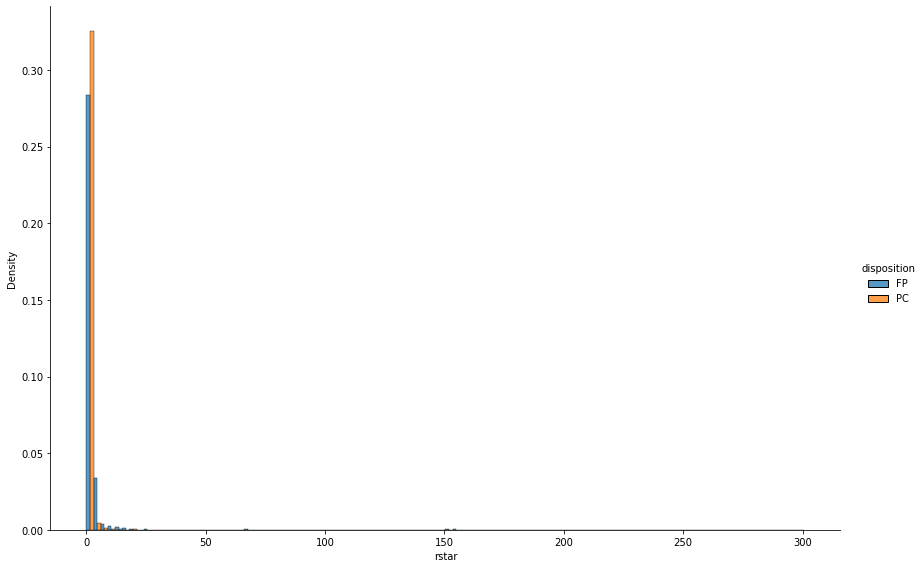

In [41]:
print('Histogram of Star Radius')
sns.displot(tce_total, x="rstar",hue='disposition',stat='density',multiple='dodge',
            common_norm=False,bins=100,height=8,aspect=1.5);

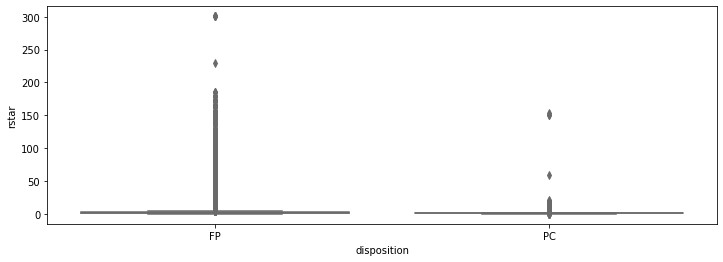

In [45]:
fig,ax=plt.subplots(figsize=(12,4))
sns.boxplot(x="disposition", y="rstar", 
                 data=tce_total, palette="Set3",ax=ax)

Distribution of Star Radius by Disposition
____________________________________________________________________________________________________


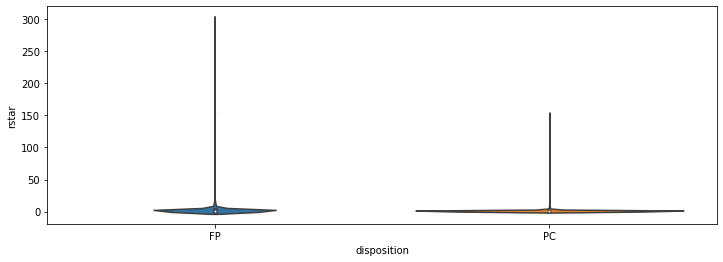

In [48]:
fig,ax=plt.subplots(figsize=(12,4))
print('Distribution of Star Radius by Disposition')
print('_'*100)
sns.violinplot(x="disposition", y="rstar", data=tce_total,ax=ax);


In [33]:
print('Distribution of Star Radius')
print('_'*27)
tce_analyze.rstar.describe()

Distribution of Star Radius
___________________________


count    32534.000000
mean         3.229264
std         13.747466
min          0.109000
25%          0.856250
50%          1.232000
75%          2.160000
max        300.749000
Name: rstar, dtype: float64

In [7]:
!ls -l

total 42208
-rw-rw-r-- 1 ubuntu ubuntu   103753 Oct 13 23:38 eda.ipynb
-rw-rw-r-- 1 ubuntu ubuntu 31546781 Oct  8 23:30 full_tce_list.csv
-rw-rw-r-- 1 ubuntu ubuntu  3248616 Oct 13 23:36 kplr_dr25_obs_robovetter_output.txt
-rw-rw-r-- 1 ubuntu ubuntu    11626 Oct  8 21:13 main.py
-rw-rw-r-- 1 ubuntu ubuntu  2744865 Oct 13 23:12 q1_q17_dr25_koi.csv
-rw-rw-r-- 1 ubuntu ubuntu  5546910 Oct 13 23:11 q1_q17_dr25_tce.csv
drwxrwxr-x 2 ubuntu ubuntu     4096 Oct 13 22:58 test.fits


In [8]:
tce2=pd.read_csv('q1_q17_dr25_tce.csv')
koi=pd.read_csv('q1_q17_dr25_koi.csv')

In [9]:
tce2.columns

Index(['kepid', 'tce_plnt_num', 'tce_rogue_flag', 'tce_period',
       'tce_period_err', 'tce_time0bk', 'tce_time0bk_err', 'tce_impact',
       'tce_impact_err', 'tce_duration', 'tce_duration_err', 'tce_depth',
       'tce_depth_err', 'tce_model_snr', 'tce_prad', 'tce_prad_err', 'tce_eqt',
       'tce_eqt_err', 'tce_insol', 'tce_insol_err', 'tce_steff',
       'tce_steff_err', 'tce_slogg', 'tce_slogg_err', 'tce_sradius',
       'tce_sradius_err'],
      dtype='object')

In [10]:
koi.columns

Index(['kepid', 'kepoi_name', 'kepler_name', 'koi_disposition',
       'koi_pdisposition', 'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss',
       'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_period_err1',
       'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1',
       'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2',
       'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth',
       'koi_depth_err1', 'koi_depth_err2', 'koi_prad', 'koi_prad_err1',
       'koi_prad_err2', 'koi_teq', 'koi_teq_err1', 'koi_teq_err2', 'koi_insol',
       'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num',
       'koi_tce_delivname', 'koi_steff', 'koi_steff_err1', 'koi_steff_err2',
       'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad',
       'koi_srad_err1', 'koi_srad_err2', 'ra_str', 'dec_str', 'koi_kepmag',
       'koi_kepmag_err'],
      dtype='object')

In [11]:
koi.koi_disposition.value_counts()

FALSE POSITIVE    3976
CONFIRMED         2344
CANDIDATE         1734
Name: koi_disposition, dtype: int64

In [12]:
koi.shape

(8054, 50)

In [13]:
tce2.shape

(34032, 26)

In [17]:
tce2.kepid.value_counts()

2556639     10
8018769     10
3458687     10
9156461     10
6715221     10
            ..
2990873      1
10339093     1
5962514      1
9306893      1
7935997      1
Name: kepid, Length: 17230, dtype: int64

In [26]:
koi[koi.kepid==2990873]

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra_str,dec_str,koi_kepmag,koi_kepmag_err
2256,2990873,K02335.01,Kepler-1194 b,CONFIRMED,CANDIDATE,0.993,0,0,0,0,...,4.46,0.068,-0.102,0.925,0.12,-0.07,19h26m47.89s,+38d08m43.0s,14.129,NaN


In [27]:
tce2[tce2.kepid==2990873]

,kepid,tce_plnt_num,tce_rogue_flag,tce_period,tce_period_err,tce_time0bk,tce_time0bk_err,tce_impact,tce_impact_err,tce_duration,...,tce_eqt,tce_eqt_err,tce_insol,tce_insol_err,tce_steff,tce_steff_err,tce_slogg,tce_slogg_err,tce_sradius,tce_sradius_err
1102,2990873,1,0,16.2238,0.000065,136.024,0.003217,0.8518,0.6257,2.662,...,676.0,33.1,49.47,9.68,5547.0,110.0,4.46,0.1,0.925,0.12


In [47]:
tce_total[tce_total.KIC==2990873]

,TCE_ID,rv_score,disposition,not_transit,stellar_eclipse,centroid_offset,ephemeris,other,Data_Set,KIC,...,alb_alt,alb_alt_perr,alb_alt_merr,mod_depth_pri_alt,mod_depth_sec_alt,mod_ph_sec_alt,mod_ph_ter_alt,sdepthsig_dv,sdepthsig_alt,radius_ratio
1223,002990873-01,0.993,PC,0,0,0,0,NaN,OBS,2990873,...,104.337,230.233,59.061,0.000251,0.000039,0.946494,0.158591,0.140563,0.159251,0.540936


In [49]:
tce_total[tce_total.KIC==5793275]

,TCE_ID,rv_score,disposition,not_transit,stellar_eclipse,centroid_offset,ephemeris,other,Data_Set,KIC,...,alb_alt,alb_alt_perr,alb_alt_merr,mod_depth_pri_alt,mod_depth_sec_alt,mod_ph_sec_alt,mod_ph_ter_alt,sdepthsig_dv,sdepthsig_alt,radius_ratio


wget -q -nH --cut-dirs=6 -r -l0 -c -N -np -erobots=off -R 'index*' -A _llc.fits -P E:\new_fits\0057/005793275 http://archive.stsci.edu/pub/kepler/lightcurves/0057/005793275/
wget -q -nH --cut-dirs=6 -r -l0 -c -N -np -erobots=off -R 'index*' -A _llc.fits -P E:\new_fits\0097/009715488 http://archive.stsci.edu/pub/kepler/lightcurves/0097/009715488/
wget -q -nH --cut-dirs=6 -r -l0 -c -N -np -erobots=off -R 'index*' -A _llc.fits -P E:\new_fits\0054/005471217 http://archive.stsci.edu/pub/kepler/lightcurves/0054/005471217/
wget -q -nH --cut-dirs=6 -r -l0 -c -N -np -erobots=off -R 'index*' -A _llc.fits -P E:\new_fits\0025/002575161 http://archive.stsci.edu/pub/kepler/lightcurves/0025/002575161/

-P save to specific location
-i to specify a txt file to read http addresses from
-q quietly
-nH disable generation of host-prefixe directories
--cut-dirs somehow deletes host directories
-c continue downloading if already started
-N turn on timestamping
-np do not ascend to parent directory
-R rejects certain files (in this case index)
-A accept list (in this case '_llc.fits')

wget -q -nH --cut-dirs=6 -r -l0 -c -N -np -erobots=off -R 'index*' -A _llc.fits -P \light_curves http://archive.stsci.edu/pub/kepler/lightcurves/0025/002575161/


In [50]:
!wget http://archive.stsci.edu/pub/kepler/lightcurves/0029/002990873

--2020-10-14 10:17:06--  http://archive.stsci.edu/pub/kepler/lightcurves/0029/002990873
Resolving archive.stsci.edu (archive.stsci.edu)... 130.167.252.39
Connecting to archive.stsci.edu (archive.stsci.edu)|130.167.252.39|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://archive.stsci.edu/pub/kepler/lightcurves/0029/002990873/ [following]
--2020-10-14 10:17:06--  http://archive.stsci.edu/pub/kepler/lightcurves/0029/002990873/
Reusing existing connection to archive.stsci.edu:80.
HTTP request sent, awaiting response... 200 OK
Length: 4036 (3.9K) [text/html]
Saving to: ‘002990873’

002990873           100%[===================>]   3.94K  --.-KB/s    in 0s      

2020-10-14 10:17:06 (310 MB/s) - ‘002990873’ saved [4036/4036]



In [53]:
!ls -l

total 87744
-rw-rw-r-- 1 ubuntu ubuntu     4036 Oct 14 10:17 002990873
drwxrwxr-x 3 ubuntu ubuntu     4096 Oct 14 10:29 E:new_fits0025
-rw-rw-r-- 1 ubuntu ubuntu   126245 Oct 14 10:32 eda.ipynb
-rw-rw-r-- 1 ubuntu ubuntu 31546781 Oct 13 23:58 full_tce_list.csv
-rw-r--r-- 1 ubuntu ubuntu 46576123 Oct 13 23:58 kplr_dr25_obs_robovetter_input.txt
-rw-rw-r-- 1 ubuntu ubuntu  3248616 Oct 13 23:36 kplr_dr25_obs_robovetter_output.txt
-rw-rw-r-- 1 ubuntu ubuntu    11626 Oct  8 21:13 main.py
drwxrwxr-x 3 ubuntu ubuntu     4096 Oct 14 10:29 new_fits0025
-rw-rw-r-- 1 ubuntu ubuntu  2744865 Oct 13 23:12 q1_q17_dr25_koi.csv
-rw-rw-r-- 1 ubuntu ubuntu  5546910 Oct 13 23:11 q1_q17_dr25_tce.csv
drwxrwxr-x 3 ubuntu ubuntu    20480 Oct 14 16:47 raw_data


In [58]:
sum(os.path.getsize(f) for f in os.listdir('raw_data/light_curves') if os.path.isfile(f))

0

In [64]:
def get_size(start_path = 'raw_data/light_curves'):
    total_size = 0
    for dirpath, dirnames, filenames in os.walk(start_path):
        for f in filenames:
            fp = os.path.join(dirpath, f)
            # skip if it is symbolic link
            if not os.path.islink(fp):
                total_size += os.path.getsize(fp)

    return total_size

print(get_size(), 'bytes')

15093472 bytes
